# 2.0 Notebook 2: Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.
## 2.1 Objectives of Data Exploration
Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.
> **The purpose of EDA is:**
* to use summary statistics and visualizations to better understand data, 
*find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
* For data preprocessing to be successful, it is essential to have an overall picture of your data
Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.** 

Next step is to explore the data. There are two approached used to examine the data using:

1. ***Descriptive statistics*** is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation. 
	
2. ***Visualization*** is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results. 


# 2.2 Descriptive statistics
Summary statistics are measurements meant to describe data. In the field of descriptive statistics, there are many [summary measurements](http://www.saedsayad.com/numerical_variables.htm))

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [10]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [11]:
#basic descriptive statistics
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [24]:
data.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

 >The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

In [12]:
data.diagnosis.unique()

array([1, 0])

In [19]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
0,357
1,212


Check binary encoding from NB1 to confirm the coversion of the diagnosis categorical data into numeric, where
* Malignant = 1 (indicates prescence of cancer cells)
* Benign = 0 (indicates abscence)

##### **Observation**
> *357 observations indicating the absence of cancer cells and 212 show absence of cancer cell*

Lets confirm this, by ploting the histogram

### 2.1 Univariant Analysis
Apply 3 techniques that you can use to understand each attribute of your dataset independently.
* Histograms.
* Density Plots.
* Box and Whisker Plots.

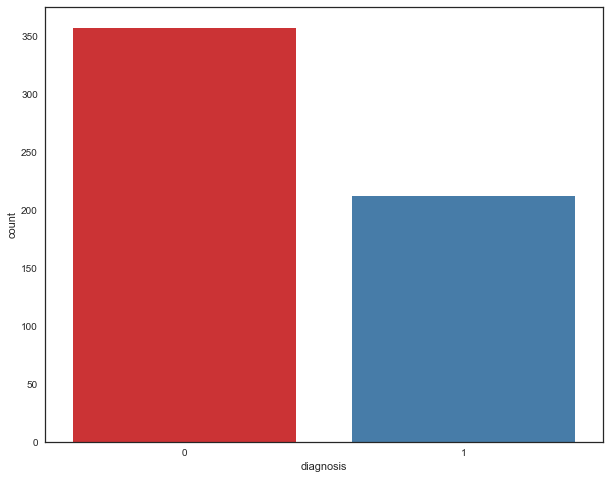

In [20]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['diagnosis'],label='Count',palette="Set1")

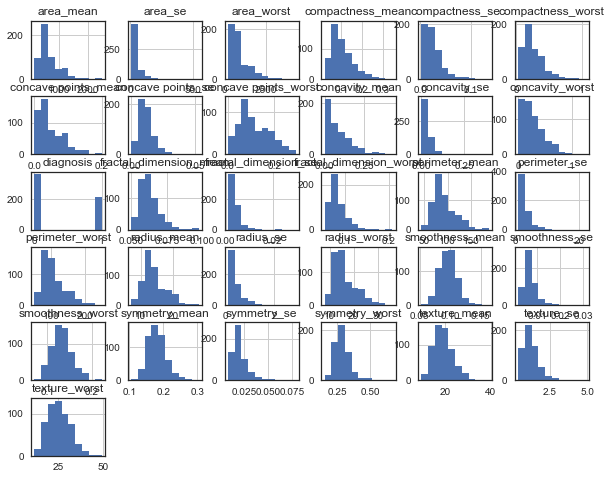

In [37]:
#fig, axes = plt.subplots(nrows=6, ncols=6)
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

hist=data.hist()
#(bins=10, facecolor='g', alpha=0.5, layout=(12,3), sharex=False )
#plt.subplots_adjust(top=1.5)
plt.show()

## Load cleaned version of the dataset

In [ ]:
#Load dataset
data = pd.read_csv('../data/cleaneddata.csv', header=0)
data=data.rename(columns = {'Unnamed: 0': 'Unnamed'}) 
data=data.drop('Unnamed', axis=1)
data.to_csv('../data/cleandata.csv')

### __Univariant Data Analysis (One-dimension analysis)__

In [ ]:
data.describe()

In [ ]:
#data['area_worst'].hist()

In [ ]:
#data['area_mean'].hist()

Area_mean is skewed to the left

In [ ]:
g = sns.pairplot(data, vars=["area_mean", "area_worst", 'area_se','radius_se'])

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

###  Whats in the data?
* Check for missing variables
* noise
* Is it continous or categorical?


In [ ]:
#check for missing variables
data.isnull().any()

Missing values in Unnamed: 32: Data cleaning next?

In [ ]:
data.head()

In [ ]:
for column in data:
    print column, data[column].nunique()